* Student Name: Varun Aggarwal 
* ECE 595 Machine Learning II
* Project 3: GAN - Student Code

In [1]:
#Import necessary packages
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.models import load_model
import matplotlib.pyplot as plt
import sys 

Using TensorFlow backend.


# Part 1 (1-3): Implementing the GAN

In [2]:
#Load MNIST data and normalize to [-1, 1]
# Fill this in
(data_train, _), _ = mnist.load_data()
data_train = (data_train*2.0/255.0)-1.0
data_train = data_train.reshape(60000, -1)

# The D-dimensional noise vector length
latent_dim = 100

# Optimizer for discriminator, which will have a higher learning rate than adversarial model
def adam_optimizer(lr,beta1=0.9):
    # FILL THIS IN
    return adam(lr,beta1)

# Genrerator model
def create_generator():
    # FILL THIS IN
    model = Sequential()
    model.add(Dense(300, input_dim=latent_dim))
    model.add(LeakyReLU(0.1))
    model.add(Dense(600))
    model.add(LeakyReLU(0.1))
    model.add(Dense(1200))
    model.add(LeakyReLU(0.1))
    model.add(Dense(784, activation='tanh'))
#     model.compile(loss='binary_crossentropy', optimizer=adam_optimizer(1e-4), metrics=['accuracy'])
    return model

# Discriminator model
def create_discriminator(drop, alpha=0.5):
    # FILL THIS IN
    model = Sequential()
    model.add(Dense(1200, input_dim=784))
    model.add(LeakyReLU(0.1))
    if drop:
        model.add(Dropout(alpha))
    model.add(Dense(600))
    model.add(LeakyReLU(0.1))
    if drop:
        model.add(Dropout(alpha))
    model.add(Dense(300))
    model.add(LeakyReLU(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=adam_optimizer(2e-4, 0.5), metrics=['accuracy'])
    return model
    
# Create adversarial model
def create_gan(discriminator, generator):
    # FILL THIS IN
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=adam_optimizer(1e-4), metrics=['accuracy'])
    return gan

# Creating GAN
generator = create_generator()
discriminator = create_discriminator(True, 0.5)
gan = create_gan(discriminator, generator)

# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 100000
batch_size = 1024 
sample_interval = epochs/10

Epoch 10000
10000: [Discriminaotr loss: 0.461141, acc: 0.437012]  [GAN loss: 2.042885, acc: 0.046875]


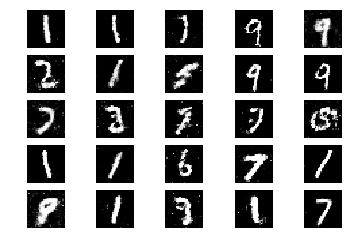

Epoch 20000
20000: [Discriminaotr loss: 0.538508, acc: 0.410156]  [GAN loss: 1.298954, acc: 0.151367]


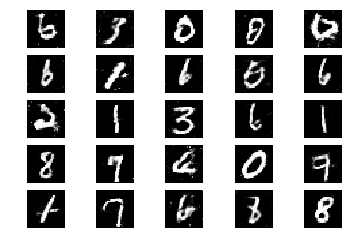

Epoch 30000
30000: [Discriminaotr loss: 0.570359, acc: 0.359375]  [GAN loss: 1.532426, acc: 0.105469]


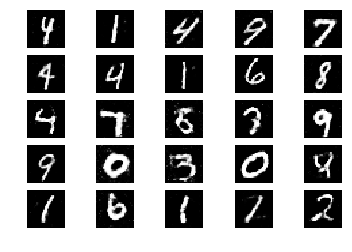

Epoch 40000
40000: [Discriminaotr loss: 0.564924, acc: 0.417480]  [GAN loss: 1.222442, acc: 0.180664]


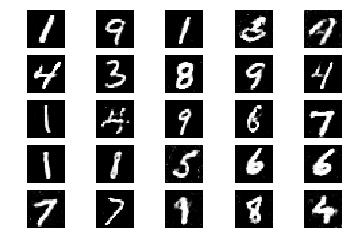

Epoch 50000
50000: [Discriminaotr loss: 0.581636, acc: 0.418457]  [GAN loss: 1.361815, acc: 0.113281]


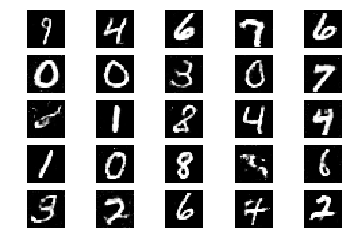

Epoch 60000
60000: [Discriminaotr loss: 0.573881, acc: 0.416504]  [GAN loss: 1.239646, acc: 0.165039]


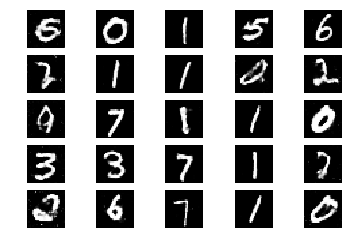

Epoch 70000
70000: [Discriminaotr loss: 0.588954, acc: 0.434082]  [GAN loss: 0.946990, acc: 0.321289]


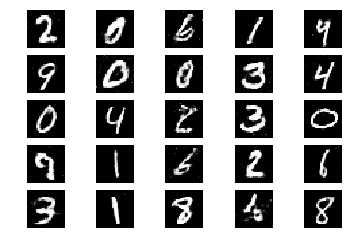

Epoch 80000
80000: [Discriminaotr loss: 0.595823, acc: 0.423340]  [GAN loss: 1.228503, acc: 0.150391]


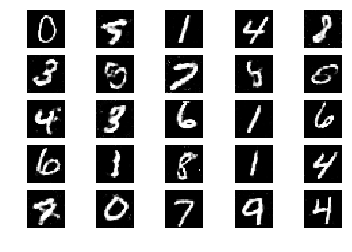

Epoch 90000
90000: [Discriminaotr loss: 0.585590, acc: 0.419434]  [GAN loss: 1.203197, acc: 0.172852]


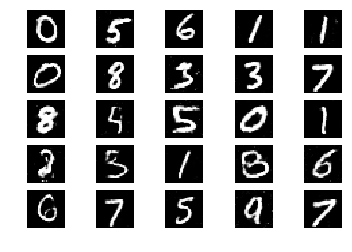

Epoch 100000
100000: [Discriminaotr loss: 0.573262, acc: 0.424316]  [GAN loss: 1.174555, acc: 0.192383]


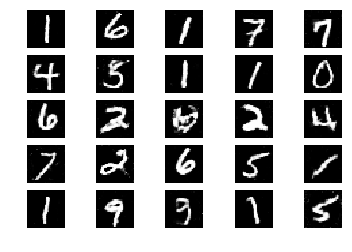

In [3]:
# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):
    
    # keep track of epoch
    sys.stdout.write("\rEpoch %i" % e)
    sys.stdout.flush()
    
    # Generate random noise as input
    # FILL THIS IN
    ran_noise = np.random.normal(0, 1, [batch_size, latent_dim])

    # Generate fake MNIST images from generated noise
    # FILL THIS IN
    fake = generator.predict(ran_noise)

    # Get a random set of real MNIST images
    # FILL THIS IN
    real = data_train[np.random.randint(0, data_train.shape[0], batch_size)]

    # Concatenate real and fake images into a single array (or batch)
    # FILL THIS IN
    batch = np.concatenate([real, fake])

    # Assign training labels (assign high probability, but not 1, to real images)
    # FILL THIS IN
    label = np.zeros(2*batch_size) 
    label[:batch_size] = 0.9

    # Allow discriminator parameters to be updated
    # FILL THIS IN
    discriminator.trainable = True

    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    d_loss = discriminator.train_on_batch(batch, label)

    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data
    # FILL THIS IN
    ran_noise = np.random.normal(0, 1, [batch_size, latent_dim])
    label = np.ones(batch_size)
    
    # Keep discriminator weights constant while training generator
    # FILL THIS IN
    discriminator.trainable = False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    gan_loss = gan.train_on_batch(ran_noise, label)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:
        # Print training status
        print("")
        log_mesg = "%d: [Discriminaotr loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        
        # Plot images 
        r, c = 5, 5

        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator.predict(ran_noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

Text(0.5,1,u'Training loss')

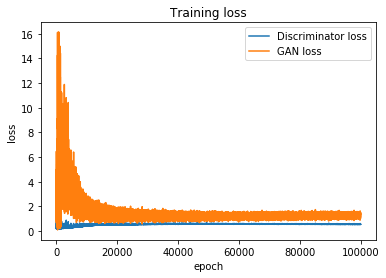

In [26]:
# Plot model loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT 
plt.plot(training_meta_data[:,0])
plt.plot(training_meta_data[:,1])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Discriminator loss','GAN loss'])
plt.title('Training loss')

Text(0.5,1,u'Training Accuracy')

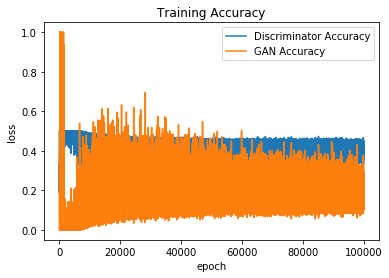

In [28]:
# Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(training_meta_data[:,2])
plt.plot(training_meta_data[:,3])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Discriminator Accuracy','GAN Accuracy'])
plt.title('Training Accuracy')

# Part 1 (4): Removing Dropout

Epoch 10000
10000: [Discriminaotr loss: 0.317586, acc: 0.491211]  [GAN loss: 3.339207, acc: 0.008789]


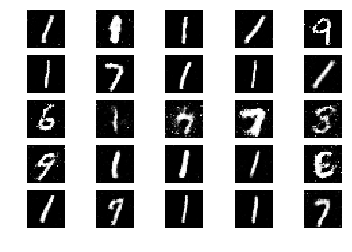

Epoch 20000
20000: [Discriminaotr loss: 0.302972, acc: 0.487793]  [GAN loss: 3.484859, acc: 0.013672]


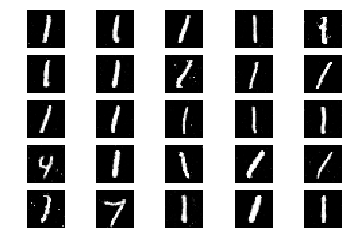

Epoch 30000
30000: [Discriminaotr loss: 0.221780, acc: 0.499512]  [GAN loss: 3.978834, acc: 0.000000]


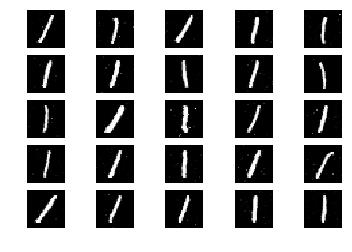

Epoch 40000
40000: [Discriminaotr loss: 0.209512, acc: 0.499512]  [GAN loss: 4.796774, acc: 0.002930]


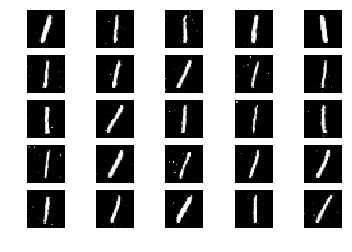

Epoch 50000
50000: [Discriminaotr loss: 0.179536, acc: 0.499512]  [GAN loss: 6.718602, acc: 0.000000]


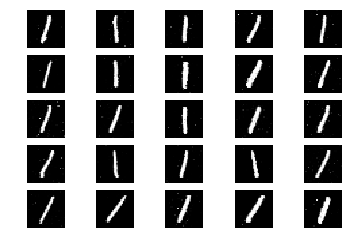

In [7]:
# Creating GAN
generator = create_generator()
discriminator = create_discriminator(False) # dropout removed
gan = create_gan(discriminator, generator)

# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 50000
batch_size = 1024 
sample_interval = epochs/5

# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):
    
    # keep track of epoch
    sys.stdout.write("\rEpoch %i" % e)
    sys.stdout.flush()
    
    # Generate random noise as input
    # FILL THIS IN
    ran_noise = np.random.normal(0, 1, [batch_size, latent_dim])

    # Generate fake MNIST images from generated noise
    # FILL THIS IN
    fake = generator.predict(ran_noise)

    # Get a random set of real MNIST images
    # FILL THIS IN
    real = data_train[np.random.randint(0, data_train.shape[0], batch_size)]

    # Concatenate real and fake images into a single array (or batch)
    # FILL THIS IN
    batch = np.concatenate([real, fake])

    # Assign training labels (assign high probability, but not 1, to real images)
    # FILL THIS IN
    label = np.zeros(2*batch_size) 
    label[:batch_size] = 0.9

    # Allow discriminator parameters to be updated
    # FILL THIS IN
    discriminator.trainable = True

    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    d_loss = discriminator.train_on_batch(batch, label)

    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data
    # FILL THIS IN
    ran_noise = np.random.normal(0, 1, [batch_size, latent_dim])
    label = np.ones(batch_size)
    
    # Keep discriminator weights constant while training generator
    # FILL THIS IN
    discriminator.trainable = False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    gan_loss = gan.train_on_batch(ran_noise, label)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:
        # Print training status
        print("")
        log_mesg = "%d: [Discriminaotr loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        
        # Plot images 
        r, c = 5, 5

        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator.predict(ran_noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

# Part 1 (5a): Reducing Dropout without changing other hyperparameters

Epoch 10000
10000: [Discriminaotr loss: 0.414921, acc: 0.487793]  [GAN loss: 1.390412, acc: 0.220703]


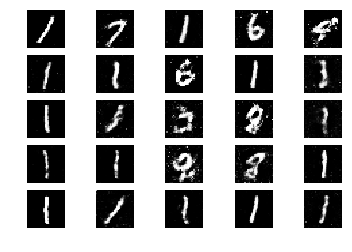

Epoch 20000
20000: [Discriminaotr loss: 0.517171, acc: 0.429199]  [GAN loss: 1.520116, acc: 0.129883]


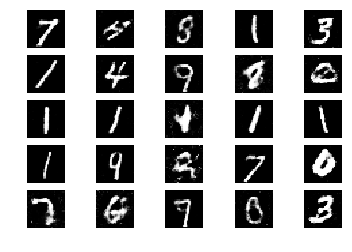

Epoch 30000
30000: [Discriminaotr loss: 0.529293, acc: 0.431152]  [GAN loss: 1.468942, acc: 0.149414]


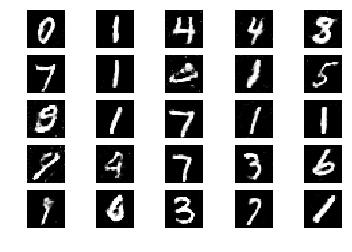

Epoch 40000
40000: [Discriminaotr loss: 0.544555, acc: 0.439941]  [GAN loss: 1.205141, acc: 0.224609]


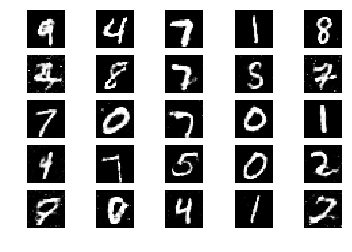

Epoch 50000
50000: [Discriminaotr loss: 0.548033, acc: 0.439941]  [GAN loss: 1.185190, acc: 0.249023]


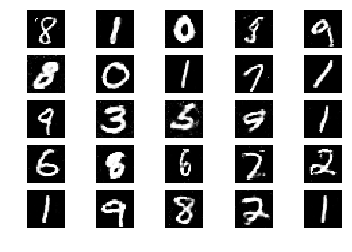

In [5]:
# Creating GAN
generator = create_generator()
discriminator = create_discriminator(True, 0.4) # decrease dropout rate
gan = create_gan(discriminator, generator)

# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 50000
batch_size = 1024 
sample_interval = epochs/5

# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):
    
    # keep track of epoch
    sys.stdout.write("\rEpoch %i" % e)
    sys.stdout.flush()
    
    # Generate random noise as input
    # FILL THIS IN
    ran_noise = np.random.normal(0, 1, [batch_size, latent_dim])

    # Generate fake MNIST images from generated noise
    # FILL THIS IN
    fake = generator.predict(ran_noise)

    # Get a random set of real MNIST images
    # FILL THIS IN
    real = data_train[np.random.randint(0, data_train.shape[0], batch_size)]

    # Concatenate real and fake images into a single array (or batch)
    # FILL THIS IN
    batch = np.concatenate([real, fake])

    # Assign training labels (assign high probability, but not 1, to real images)
    # FILL THIS IN
    label = np.zeros(2*batch_size) 
    label[:batch_size] = 0.9

    # Allow discriminator parameters to be updated
    # FILL THIS IN
    discriminator.trainable = True

    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    d_loss = discriminator.train_on_batch(batch, label)

    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data
    # FILL THIS IN
    ran_noise = np.random.normal(0, 1, [batch_size, latent_dim])
    label = np.ones(batch_size)
    
    # Keep discriminator weights constant while training generator
    # FILL THIS IN
    discriminator.trainable = False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    gan_loss = gan.train_on_batch(ran_noise, label)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:
        # Print training status
        print("")
        log_mesg = "%d: [Discriminaotr loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        
        # Plot images 
        r, c = 5, 5

        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator.predict(ran_noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

**(4). Compare and comment on the results of GAN with dropout and without dropout.**

ANS: The output without the dropouts generates all the images as 1. This could reflect the problem of memorization which accompanies GANs. A possible solution to this problem is using dropout layers.    


**(5)(a). Comment on importance of hyper-parameter tuning**

ANS: By decreasing the dorppout rate from 0.5 to 0.4, no visible difference in the generated imagescan be seen. Even the accuracies, loss value for both discreminator and GAN are very similar in the first 50,000 epochs.   


**(5)(b). Comment on importance of hyper-parameter tuning**

ANS: With similar dropout rate, other hyperparameters that can be changed are, magnitude of injected noise, learning rate, changing class probabilites from 0.9 to other value, activation funciton, number of layers.  In default architecture in part 1, the accuracy in part 3 is 100%. This means that quality of generated images in very high. Hence need for hyperparameter tuning is not necessary. 


**(6). Answer the following questions:**

**a.   Why does the accuracy of the discriminator remain around 50%? Is this a good trait of the GAN? **

  ANS: This is because, 50% of the images are labeled as 0 i.e. fake and rest of the 50% are labeled as real. What this means that discriminator is correctly able to discriminate between the two and continue to learn even as generator is getting better at generating images.  


**b.   How could this model be modified to produce cleaner (less noisy) images? **

  ANS: Number of training iterations can be increased, or more original data samples can be used. In addition, architecture for generator can updated to include layers like max pooling, convolution. 

# Part 2: Generating samples using trained generator

In [11]:
# Generate ten images from Gaussian noise using the trained generator from Part 1
# FILL THIS IN
ran_noise = np.random.normal(0, 1, [10, latent_dim])
gen_images = generator.predict(ran_noise)

# Re-scale generated images to lie in [0, 1]
# FILL THIS IN
gen_images = 0.5 * gen_images + 0.5

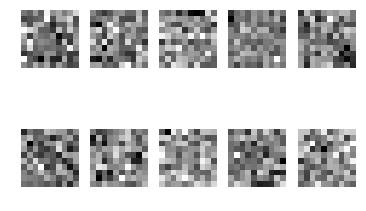

In [12]:
# Visualize generated noise
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((ran_noise[cnt].reshape(10, 10)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

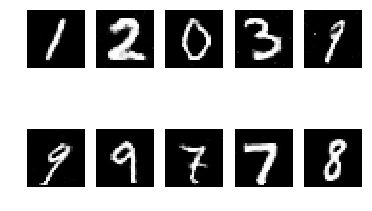

In [13]:
# Visualize generated samples
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((gen_images[cnt].reshape(28, 28)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

# Part 3: Testing accuracy of generated images on ten samples

In [8]:
# Load mnist classifier and generated images
mnist_classifier = load_model('mnist_classifier.h5')

In [18]:
# ASSIGN CLASSES
labels = [1,2,0,3,9,9,9,7,7,8]

# Show classifications
# FILL THIS IN 
pred_mnist = mnist_classifier.predict(gen_images)
print("Classification\n")
print(pred_mnist)

print("\n\nPredicted Labels")
print(np.argmax(pred_mnist, axis=1))
print("\nTrue Labels")
print(labels)

# Convert integer labels to one-hot labels 
labels = keras.utils.np_utils.to_categorical(labels, num_classes=10)

# Evaluate accuracy
# FILL THIS IN 
loss, acc = mnist_classifier.evaluate(gen_images, labels, verbose=0)
# print(acc*100)
print("\nLoss: {:e}\n\nAccuracy: {:0.2f}%".format(loss, acc*100))

Classification

[[1.06663257e-30 1.00000000e+00 2.08921124e-21 2.60950648e-35
  1.36602343e-17 9.33132125e-28 1.68141503e-27 2.21302483e-24
  9.75120190e-28 3.38756129e-33]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 2.96726959e-31 1.29713674e-36
  5.64880091e-34 1.50784170e-29 2.74416441e-28 2.73040006e-22
  1.13366373e-36 3.50122546e-22]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00407696e-16 4.27995656e-06 1.89336745e-17 1.07729103e-09
  3.09814685e-09 1.23235925e-14 5.46403433e-23 3.87756227e-05
  3.03634771e-08 9.99956965e-01]
 [3.12407808e-26 2.35664684e-28 0.00000000e+00 3.09411253e-23
  2.56001547e-16 7.48146987e-28 1.03981612e-29 1.12527676e-18
  2.48920747e-30 1.00000000e+00]
 [1.40389411e-35 2.82245348e-35 2.78832770

**a) State the accuracy of the classifier on your ten generated images. Based on this accuracy, would you say your generator does well in producing images comparable to those in the MNIST dataset of hand-written digits? Why or why not?**  

The accuracy of the classifier is 100%. THe generator is definitely generating comparable images to MNISt dataset.

**b) In this project, we only tested the performance of the pre-trained classifier on ten samples and used its result to determine the robustness of the generator. How could we better assess the quality of the generated images using this pre-trained classifier and the saved generator?**  

Visual inspeciton can be used to determine the robustness of the classifier. Looking at the accuracy value when using more than 10 generated images can also be another indicator. Classificaiton accuracies for each image can also be compared. 